<div style="text-align: center;">
  <h2>Predictive Modeling of Restaurant Dataset: A Comparative Study of MLR, Decision Tree, and Random Forest Algorithms</h2>
    <h4>Srimanta Ghosh</h4>
</div>

### Introduction

Welcome to our Predictive Modeling task! In this project, we aim to predict restaurant ratings using machine learning techniques. Our goals are straightforward:

1. **Build a Regression Model**: We'll create a model to predict restaurant ratings based on various features.
2. **Evaluate Model Performance**: We'll split the data, test our model, and measure how well it predicts ratings.
3. **Compare Different Algorithms**: We'll try out different approaches like linear regression, decision trees, and random forest to see which works best.

Through this project, we're on a quest to uncover the secrets behind restaurant ratings and improve our understanding of predictive modeling techniques. Let's dive in and explore the fascinating world of restaurant data analysis!


#### Loading Dataset
- This code snippet imports the necessary libraries: pandas, matplotlib, and seaborn.
- It reads a CSV file named "Dataset.csv" located at the specified path and stores it in a pandas DataFrame called `data`.
- Finally, it displays the first few rows of the dataset using the `head()` function.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Loading the dataset
data = pd.read_csv(r"C:\Users\gh22s\AppData\Local\Programs\Python\Python312\Scripts\notebooks\Cognifyz\Dataset .csv")
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


#### Extracting Numerical and Categorical Features
- These lines of code extract numerical and categorical features from the dataset.
- `numerical_features` stores the column names of numerical features by excluding columns with data type "object".
- `categorical_features` stores the column names of categorical features by including only columns with data type "object".

In [2]:
numerical_features = data.select_dtypes(exclude = ["object"]).columns
numerical_features

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [3]:
categorical_features = data.select_dtypes(include = ["object"]).columns
categorical_features

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

#### Currency Conversion
- The first line prints the unique values present in the 'Currency' column of the dataset.
- `currency_conversion_rates` is a dictionary mapping each currency to its conversion rate to Indian Rupees (INR).
- The last line applies a lambda function to each row of the DataFrame to calculate the equivalent cost for two people in INR based on the 'Average Cost for two' column and the conversion rate specified by the 'Currency' column. The result is stored in a new column named 'Average Cost for two in INR'.

In [4]:
data['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(��)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [5]:
# currency to a standardized form
# currency conversion rates
currency_conversion_rates = {
    'Botswana Pula(P)': 6.10,  # Botswana Pula to INR
    'Brazilian Real(R$)': 16.60,   # Brazilian Real to INR
    'Dollar($)': 82.95,       # Dollar (USD) to INR
    'Emirati Diram(AED)': 22.59,  # Emirati Diram to INR
    'Indian Rupees(Rs.)': 1, # Indian Rupees to INR
    'Indonesian Rupiah(IDR)': 0.0053, # Indonesian Rupiah to INR
    'NewZealand($)': 50.60,  # New Zealand Dollar to INR
    'Pounds(��)': 105.66,   # Pounds to INR
    'Qatari Rial(QR)': 22.79,   # Qatari Rial to INR
    'Rand(R)': 4.42,   # Rand to INR
    'Sri Lankan Rupee(LKR)': 0.27,# Sri Lankan Rupee to INR
    'Turkish Lira(TL)': 2.57    # Turkish Lira to INR
}
data['Average Cost for two in INR'] = data.apply(lambda row: row['Average Cost for two'] * currency_conversion_rates[row['Currency']], axis=1)

#### Filtering Rows and Defining Mapping Dictionaries
- This code snippet filters out rows from the dataset where the 'Rating text' is not 'Not rated' and the 'Rating color' is not 'White'. The filtered data is copied into a new DataFrame named `df`.
- Two mapping dictionaries, `rating_text_sentiment_mapping` and `rating_color_sentiment_mapping`, are defined to map rating text and rating color to custom sentiment scores.
- The 'Rating Text Sentiment' and 'Rating Color Sentiment' columns are created in the `df` DataFrame by mapping the corresponding rating text and color values to their custom sentiment scores.

In [6]:
# Filtering out rows with rating text as "Not rated" and rating color as "White"
df = data[(data['Rating text'] != 'Not rated') & (data['Rating color'] != 'White')].copy()

In [7]:
# Defining mapping dictionaries for rating text and rating color with custom sentiment scores
rating_text_sentiment_mapping = {
    'Poor': 0,
    'Average': 0.25,
    'Good': 0.5,
    'Very Good': 0.75,
    'Excellent': 1
}

rating_color_sentiment_mapping = {
    'Red': 0,
    'Orange': 0.25,
    'Yellow': 0.5,
    'Green': 0.75,
    'Dark Green': 1
}

# Encoding rating text and rating color columns based on custom sentiment scores
df['Rating Text Sentiment'] = df['Rating text'].map(rating_text_sentiment_mapping)
df['Rating Color Sentiment'] = df['Rating color'].map(rating_color_sentiment_mapping)

#### Encoding Categorical Variables

- This code snippet encodes categorical variables in the DataFrame `df` using scikit-learn's LabelEncoder.
- A dictionary named `label_encoders` is initialized to store the label encoder objects for each categorical column.
- A loop iterates over selected categorical columns, fits a label encoder to each column, transforms the column values, and assigns the transformed values back to the respective columns in the DataFrame `df`.

In [8]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in ["City", "Cuisines", "Has Table booking", "Has Online delivery", "Is delivering now","Switch to order menu"]:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

#### Creating DataFrame with Necessary Columns
- This code snippet creates a new DataFrame named `dff` containing only the necessary columns required for predictive modeling.
- The selected columns include geographical coordinates (longitude and latitude), information about cuisines, booking and delivery options, price range, aggregate rating, custom sentiment scores for rating text and color, votes, and average cost for two in INR.

In [9]:
# Necessary Coloumns for predictive modeling 
dff = df[['City', 'Longitude', 'Latitude', 'Cuisines', 'Has Table booking',
       'Has Online delivery', 'Is delivering now',
       'Price range', 'Aggregate rating', 'Rating Text Sentiment', 'Rating Color Sentiment',
       'Votes', 'Average Cost for two in INR']]
dff

,City,Longitude,Latitude,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating Text Sentiment,Rating Color Sentiment,Votes,Average Cost for two in INR
0,73,121.027535,14.565443,870,1,0,0,3,4.8,1.00,1.00,314,6710.00
1,73,121.014101,14.553708,1053,1,0,0,3,4.5,1.00,1.00,591,7320.00
2,75,121.056831,14.581404,1577,1,0,0,4,4.4,0.75,0.75,270,24400.00
3,75,121.056475,14.585318,1068,0,0,0,4,4.9,1.00,1.00,365,9150.00
4,75,121.057508,14.584450,1064,1,0,0,4,4.8,1.00,1.00,229,9150.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,140,28.977392,41.022793,1704,0,0,0,3,4.1,0.75,0.75,788,205.60
9547,140,29.041297,41.009847,1714,0,0,0,3,4.2,0.75,0.75,1034,269.85
9548,140,29.034640,41.055817,1052,0,0,0,4,3.7,0.50,0.50,661,436.90
9549,140,29.036019,41.057979,1563,0,0,0,4,4.0,0.75,0.75,901,308.40


#### Splitting Features and Target Variable
- This code snippet splits the DataFrame `dff` into features `X` and the target variable `y` for predictive modeling.
- The features `X` consist of all columns except the "Aggregate rating" column, which serves as the target variable `y`.


In [10]:
# Splitting the dataset into features and target variable
X = dff.drop("Aggregate rating", axis=1)
y = dff["Aggregate rating"]

#### Splitting the Dataset into Training and Testing Sets
- This code snippet splits the features `X` and target variable `y` into training and testing sets using scikit-learn's `train_test_split` function.
- The dataset is split into training and testing sets with a test size of 20% `test_size=0.2`, and a random state of 42 is set for reproducibility.

In [11]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Visualizing Aggregate Rating Distribution
- This code snippet visualizes the distribution of the aggregate rating using seaborn and matplotlib libraries.
- A histogram with a kernel density estimate (KDE) is plotted to depict the frequency distribution of aggregate ratings.
- The plot provides insights into the distribution of ratings, aiding in understanding the overall sentiment or quality of the data.


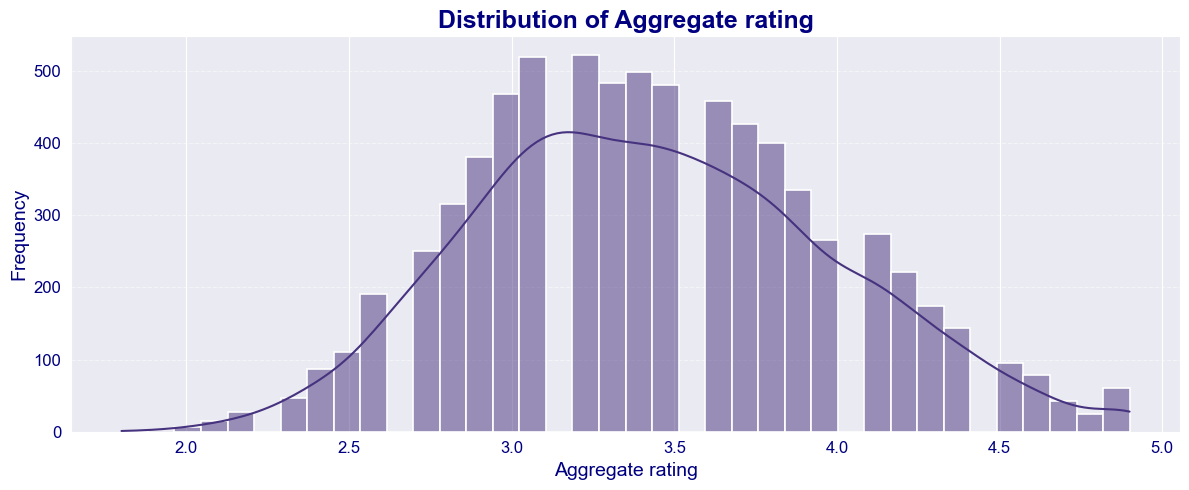

In [12]:
sns.set_style('darkgrid')  

color_palette = sns.color_palette("viridis")

plt.figure(figsize=(12, 5))
sns.histplot(dff["Aggregate rating"], kde=True, color=color_palette[0], edgecolor=None, linewidth=1.2)
plt.title("Distribution of Aggregate rating", fontsize=18, fontweight='bold', color='navy')
plt.xlabel("Aggregate rating", fontsize=14, color='navy')
plt.ylabel("Frequency", fontsize=14, color='navy')
plt.xticks(fontsize=12, color='navy')
plt.yticks(fontsize=12, color='navy')
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

#### Visualizing Correlation Matrix
- This code snippet visualizes the correlation matrix of features using seaborn and matplotlib libraries.
- A heatmap is plotted to display the correlation coefficients between different features.
- The annotations on the heatmap provide insights into the strength and direction of relationships between features, facilitating feature selection and understanding of multicollinearity.

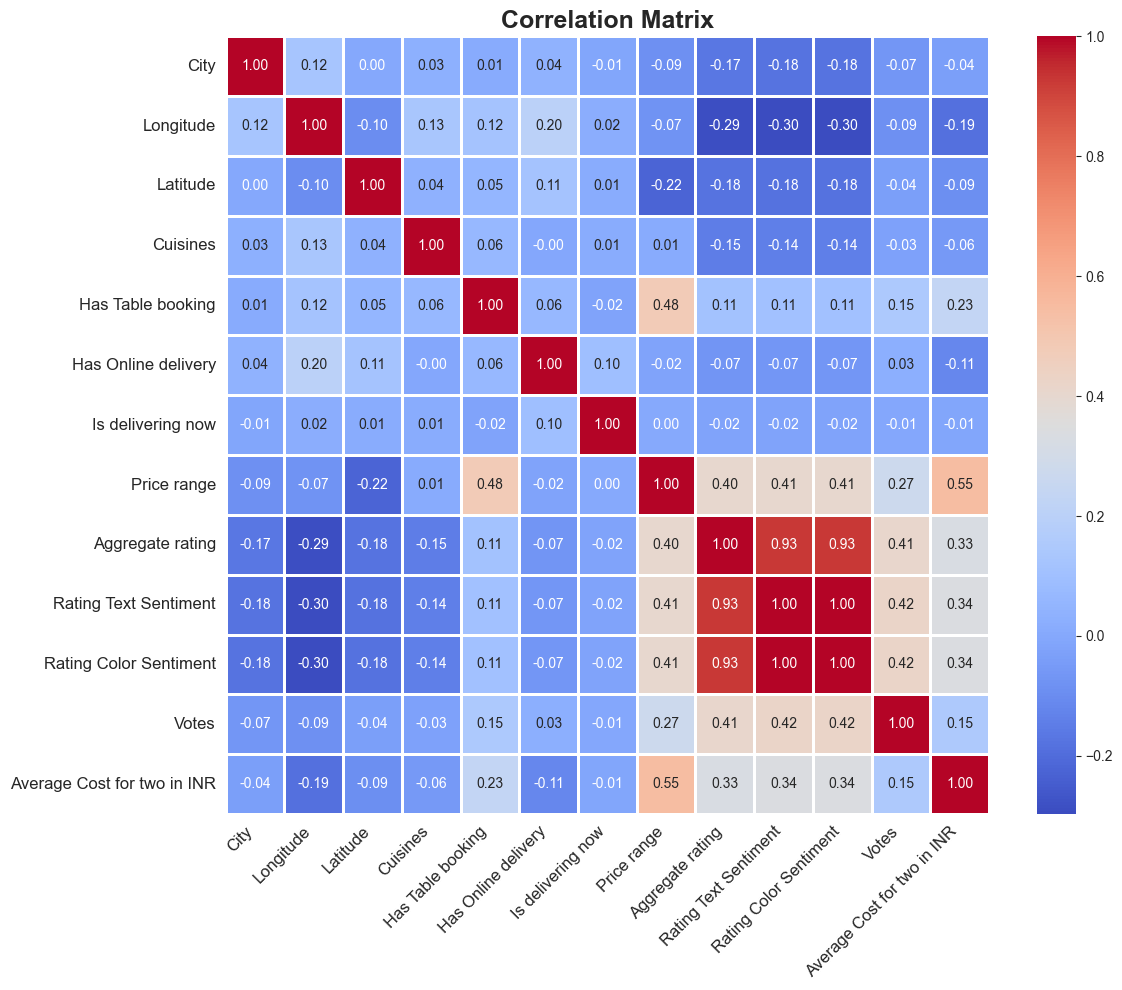

In [13]:
# Calculating correlation matrix
corr_matrix = dff.corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, linecolor="white")
plt.title("Correlation Matrix", fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tick_params(axis="both", labelsize=12)
plt.tight_layout()
plt.show()

#### Linear Regression Model
- This code snippet trains a Linear Regression model using the LinearRegression class from scikit-learn.
- The model is trained on the training data `X_train`, `y_train`.
- Predictions are made on the testing data `X_test`, and metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared score are calculated to evaluate the model's performance.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# training the model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Prediction on the testing set
linear_reg_pred = linear_reg.predict(X_test)

# Evaluation the model
linear_reg_mae = mean_absolute_error(y_test, linear_reg_pred)
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
linear_reg_r2 = r2_score(y_test, linear_reg_pred)

print("Linear Regression Metrics:")
print("Mean Absolute Error:", linear_reg_mae)
print("Mean Squared Error:", linear_reg_mse)
print("R-squared Score:", linear_reg_r2)

Linear Regression Metrics:
Mean Absolute Error: 0.16959578279684198
Mean Squared Error: 0.043250921196418185
R-squared Score: 0.8601563294410801


#### Decision Tree Model
- This code snippet trains a Decision Tree Regression model using the DecisionTreeRegressor class from scikit-learn.
- The model is trained on the training data `X_train`, `y_train`.
- Predictions are made on the testing data `X_test`, and metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared score are calculated to evaluate the model's performance.

In [15]:
from sklearn.tree import DecisionTreeRegressor

# training the model
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

# Prediction on the testing set
dt_reg_pred = dt_reg.predict(X_test)

# Evaluation of the model
dt_reg_mae = mean_absolute_error(y_test, dt_reg_pred)
dt_reg_mse = mean_squared_error(y_test, dt_reg_pred)
dt_reg_r2 = r2_score(y_test, dt_reg_pred)

print("Decision Tree Regression Metrics:")
print("Mean Absolute Error:", dt_reg_mae)
print("Mean Squared Error:", dt_reg_mse)
print("R-squared Score:", dt_reg_r2)

Decision Tree Regression Metrics:
Mean Absolute Error: 0.19345037137069548
Mean Squared Error: 0.0727548953409858
R-squared Score: 0.7647608112343259


#### Random Forest Model
- This code snippet trains a Random Forest Regression model using the RandomForestRegressor class from scikit-learn.
- The model is trained on the training data `X_train`, `y_train` with 100 decision trees `n_estimators=100`.
- Predictions are made on the testing data `X_test`, and metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared score are calculated to evaluate the model's performance.

In [16]:
from sklearn.ensemble import RandomForestRegressor

# training the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Prediction on the testing set
rf_reg_pred = rf_reg.predict(X_test)

# Evaluation of the model
rf_reg_mae = mean_absolute_error(y_test, rf_reg_pred)
rf_reg_mse = mean_squared_error(y_test, rf_reg_pred)
rf_reg_r2 = r2_score(y_test, rf_reg_pred)

print("Random Forest Regression Metrics:")
print("Mean Absolute Error:", rf_reg_mae)
print("Mean Squared Error:", rf_reg_mse)
print("R-squared Score:", rf_reg_r2)

Random Forest Regression Metrics:
Mean Absolute Error: 0.15201012829169477
Mean Squared Error: 0.038840447670492884
R-squared Score: 0.8744167611199183


#### Model Comparison & Visualization
- This code creates a DataFrame `comparison_df` containing metrics (MAE, MSE, R-squared) for each model: Linear Regression, Decision Tree Regression, and Random Forest Regression.
- It visualizes the comparison of these metrics using bar plots for better interpretation.
- Finally, it displays the comparison DataFrame showing the metrics for each model.

Model Comparison:


,Model,MAE,MSE,R-squared
0,Linear Regression,0.169596,0.043251,0.860156
1,Decision Tree,0.193450,0.072755,0.764761
2,Random Forest,0.152010,0.038840,0.874417


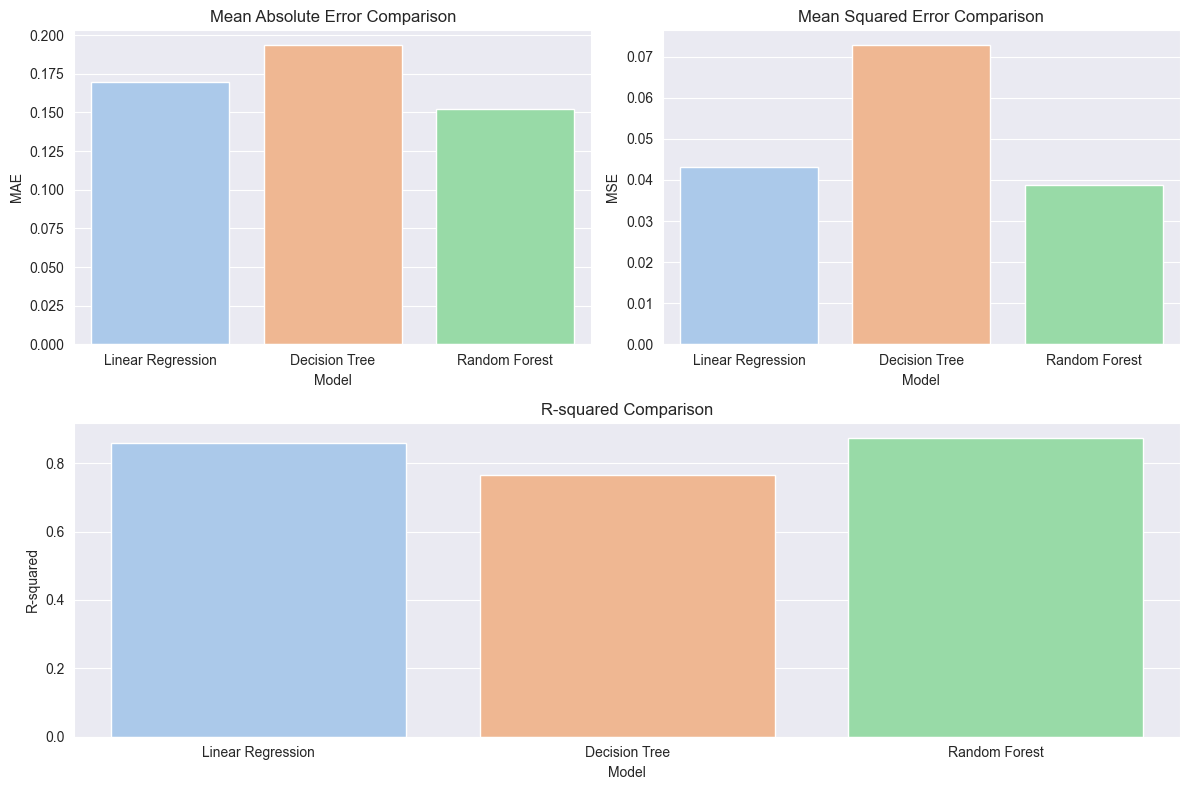

In [17]:
# a DataFrame for comparison
comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MAE": [linear_reg_mae, dt_reg_mae, rf_reg_mae],
    "MSE": [linear_reg_mse, dt_reg_mse, rf_reg_mse],
    "R-squared": [linear_reg_r2, dt_reg_r2, rf_reg_r2]
})

# Set up visualization parameters
plt.figure(figsize=(12, 8))
color_palette = sns.color_palette("pastel", 3)  # Set the palette to have only 3 colors

# Plot MAE comparison
plt.subplot(2, 2, 1)
sns.barplot(x="Model", y="MAE", data=comparison_df, palette=color_palette, hue="Model", dodge=False)
plt.title("Mean Absolute Error Comparison")
plt.xlabel("Model")
plt.ylabel("MAE")

# Plot MSE comparison
plt.subplot(2, 2, 2)
sns.barplot(x="Model", y="MSE", data=comparison_df, palette=color_palette, hue="Model", dodge=False)
plt.title("Mean Squared Error Comparison")
plt.xlabel("Model")
plt.ylabel("MSE")

# Plot R-squared comparison
plt.subplot(2, 1, 2)
sns.barplot(x="Model", y="R-squared", data=comparison_df, palette=color_palette, hue="Model", dodge=False)
plt.title("R-squared Comparison")
plt.xlabel("Model")
plt.ylabel("R-squared")

plt.tight_layout()

# Displaying comparison DataFrame
print("Model Comparison:")
display(comparison_df)

### Conclusion
In conclusion, our journey through this project has been enlightening and rewarding. We've ventured into the intricate world of predictive modeling, utilizing machine learning algorithms to decipher patterns within restaurant data. By meticulously preprocessing the dataset, training various models, and evaluating their performance, we've gained valuable insights into the factors influencing restaurant ratings. Through visualization and analysis, we've uncovered nuances in the data, paving the way for informed decision-making in the culinary domain. As we wrap up this project, we emerge with a deeper understanding of predictive modeling techniques and their application in real-world scenarios.
